# LSTM Model

In [21]:
import pandas as pd
ts = pd.read_csv("bike_sharing_dataset.csv", index_col = 0, usecols=['date','total_cust'], parse_dates=True)
ts.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=2922, freq=None)

In [22]:
ts.isnull().sum()

total_cust    4
dtype: int64

In [23]:
ts.fillna(ts.median(), inplace = True)
ts.isnull().sum()

total_cust    0
dtype: int64

<AxesSubplot:xlabel='date'>

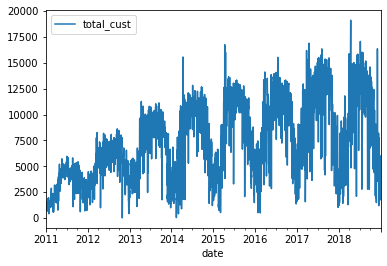

In [24]:
ts.plot()

# from statsmodels.tsa.seasonal import seasonal_decompose
# from matplotlib import pyplot as plt

# plt.figure(figsize=(16,8))
# res = seasonal_decompose(ts['total_cust'])
# res.plot();

In [25]:
print(len(ts))
ts

2922


,total_cust
date,
2011-01-01,959.0
2011-01-02,781.0
2011-01-03,1301.0
2011-01-04,1536.0
2011-01-05,1571.0
...,...
2018-12-27,5430.0
2018-12-28,2125.0
2018-12-29,6008.0


In [26]:
# preprocess data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ts_sc = scaler.fit_transform(ts)

train = ts_sc[:2337]
val = ts_sc[2337:]

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 100
n_feats = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)
generator_val = TimeseriesGenerator(val, val, length=n_input, batch_size=1)

In [43]:
x, y = generator[0]
val_X, val_y = generator_val[0]

In [48]:
def LSTM(unit):
    """Creates LSTM architecture"""
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(unit, input_shape = (n_input, n_feats), activation = 'relu'))
    
    model.add(tf.keras.layers.Dense(16, activation = 'linear'))
    model.add(tf.keras.layers.Dense(1, activation = 'linear'))
    print("created LSTM")
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['MSE'])
    print("compiled LSTM")
    
    return model

LSTM = LSTM(128)
LSTM.summary()

created LSTM
compiled LSTM
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 68,641
Trainable params: 68,641
Non-trainable params: 0
_________________________________________________________________


In [49]:
LSTM.fit(x, y, epochs=100, batch_size=16, verbose=1, validation_data=(val_X, val_y))
score = LSTM.evaluate(val_X, val_y, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0312 - MSE: 0.0312 - val_loss: 0.6069 - val_MSE: 0.6069
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 0.0246 - MSE: 0.0246 - val_loss: 0.5418 - val_MSE: 0.5418
Epoch 3/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0190 - MSE: 0.0190 - val_loss: 0.4818 - val_MSE: 0.4818
Epoch 4/100
1/1 [==============================] - 0s 70ms/step - loss: 0.0142 - MSE: 0.0142 - val_loss: 0.4236 - val_MSE: 0.4236
Epoch 5/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0101 - MSE: 0.0101 - val_loss: 0.3671 - val_MSE: 0.3671
Epoch 6/100
1/1 [==============================] - 0s 93ms/step - loss: 0.0067 - MSE: 0.0067 - val_loss: 0.3115 - val_MSE: 0.3115
Epoch 7/100
1/1 [==============================] - 0s 103ms/step - loss: 0.0038 - MSE: 0.0038 - val_loss: 0.2569 - val_MSE: 0.2569
Epoch 8/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0017 - MSE: 0.001

Epoch 61/100
1/1 [==============================] - 0s 89ms/step - loss: 5.2377e-06 - MSE: 5.2377e-06 - val_loss: 0.2279 - val_MSE: 0.2279
Epoch 62/100
1/1 [==============================] - 0s 61ms/step - loss: 2.5432e-06 - MSE: 2.5432e-06 - val_loss: 0.2267 - val_MSE: 0.2267
Epoch 63/100
1/1 [==============================] - 0s 67ms/step - loss: 7.7945e-07 - MSE: 7.7945e-07 - val_loss: 0.2256 - val_MSE: 0.2256
Epoch 64/100
1/1 [==============================] - 0s 62ms/step - loss: 3.6164e-08 - MSE: 3.6164e-08 - val_loss: 0.2245 - val_MSE: 0.2245
Epoch 65/100
1/1 [==============================] - 0s 61ms/step - loss: 2.0202e-07 - MSE: 2.0202e-07 - val_loss: 0.2235 - val_MSE: 0.2235
Epoch 66/100
1/1 [==============================] - 0s 57ms/step - loss: 1.0141e-06 - MSE: 1.0141e-06 - val_loss: 0.2228 - val_MSE: 0.2228
Epoch 67/100
1/1 [==============================] - 0s 62ms/step - loss: 2.1308e-06 - MSE: 2.1308e-06 - val_loss: 0.2222 - val_MSE: 0.2222
Epoch 68/100
1/1 [=========

In [56]:
loss_per_epoch = tf.keras.callbacks.History.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

AttributeError: type object 'History' has no attribute 'history'